<a href="https://colab.research.google.com/github/jessica8403/TIL/blob/master/practice_22_01_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
rawData=pd.read_csv('/content/drive/MyDrive/멀티캠퍼스/대기오염정보/airTraffic.csv')
rawData

,날짜,PM10,PM2.5,오 존,이산화질소,일산화탄소,아황산가스,vol
0,07-01-01,43.0,28.0,0.014,0.036,0.5,0.003,1542.0
1,07-01-02,38.0,25.0,0.013,0.029,0.5,0.003,1173.0
2,07-01-03,37.0,25.0,0.014,0.022,0.4,0.003,869.0
3,07-01-04,36.0,23.0,0.016,0.016,0.4,0.003,711.0
4,07-01-05,38.0,22.0,0.014,0.016,0.4,0.003,659.0
...,...,...,...,...,...,...,...,...
739,07-31-20,26.0,21.0,0.052,0.015,0.4,0.004,2456.0
740,07-31-21,26.0,19.0,0.042,0.017,0.4,0.004,1960.0
741,07-31-22,20.0,14.0,0.051,0.011,0.4,0.004,2083.0
742,07-31-23,22.0,17.0,0.052,0.011,0.4,0.003,2270.0


In [3]:
from matplotlib import font_manager, rcParams
!apt-get install fonts-nanum*
rcParams['font.family'] = 'NanumGothicCoding'
rcParams['axes.unicode_minus'] = False
font_manager._rebuild()

Reading package lists... Done
Building dependency tree       
Reading state information... Done
Note, selecting 'fonts-nanum-eco' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum-gothic-light' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum-coding' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum-extra' for glob 'fonts-nanum*'
fonts-nanum is already the newest version (20170925-1).
fonts-nanum-coding is already the newest version (2.5-1).
fonts-nanum-eco is already the newest version (1.000-6).
fonts-nanum-extra is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.


In [4]:
rawData['dateTime'] = rawData['날짜']
rawData

,날짜,PM10,PM2.5,오 존,이산화질소,일산화탄소,아황산가스,vol,dateTime
0,07-01-01,43.0,28.0,0.014,0.036,0.5,0.003,1542.0,07-01-01
1,07-01-02,38.0,25.0,0.013,0.029,0.5,0.003,1173.0,07-01-02
2,07-01-03,37.0,25.0,0.014,0.022,0.4,0.003,869.0,07-01-03
3,07-01-04,36.0,23.0,0.016,0.016,0.4,0.003,711.0,07-01-04
4,07-01-05,38.0,22.0,0.014,0.016,0.4,0.003,659.0,07-01-05
...,...,...,...,...,...,...,...,...,...
739,07-31-20,26.0,21.0,0.052,0.015,0.4,0.004,2456.0,07-31-20
740,07-31-21,26.0,19.0,0.042,0.017,0.4,0.004,1960.0,07-31-21
741,07-31-22,20.0,14.0,0.051,0.011,0.4,0.004,2083.0,07-31-22
742,07-31-23,22.0,17.0,0.052,0.011,0.4,0.003,2270.0,07-31-23


In [5]:
def setDateTime( row ):
  month, day, hour = row['dateTime'].split('-')
  hour = '{:02}'.format(int(hour) - 1)
  return pd.to_datetime( '-'.join( [ '2021', month, day, hour] ), format='%Y-%m-%d-%H' )

rawData['dateTime'] = rawData.apply( lambda x: setDateTime(x), axis=1 )
rawData

,날짜,PM10,PM2.5,오 존,이산화질소,일산화탄소,아황산가스,vol,dateTime
0,07-01-01,43.0,28.0,0.014,0.036,0.5,0.003,1542.0,2021-07-01 00:00:00
1,07-01-02,38.0,25.0,0.013,0.029,0.5,0.003,1173.0,2021-07-01 01:00:00
2,07-01-03,37.0,25.0,0.014,0.022,0.4,0.003,869.0,2021-07-01 02:00:00
3,07-01-04,36.0,23.0,0.016,0.016,0.4,0.003,711.0,2021-07-01 03:00:00
4,07-01-05,38.0,22.0,0.014,0.016,0.4,0.003,659.0,2021-07-01 04:00:00
...,...,...,...,...,...,...,...,...,...
739,07-31-20,26.0,21.0,0.052,0.015,0.4,0.004,2456.0,2021-07-31 19:00:00
740,07-31-21,26.0,19.0,0.042,0.017,0.4,0.004,1960.0,2021-07-31 20:00:00
741,07-31-22,20.0,14.0,0.051,0.011,0.4,0.004,2083.0,2021-07-31 21:00:00
742,07-31-23,22.0,17.0,0.052,0.011,0.4,0.003,2270.0,2021-07-31 22:00:00


In [6]:
rawData.set_index('dateTime', inplace=True)
rawData

,날짜,PM10,PM2.5,오 존,이산화질소,일산화탄소,아황산가스,vol
dateTime,,,,,,,,
2021-07-01 00:00:00,07-01-01,43.0,28.0,0.014,0.036,0.5,0.003,1542.0
2021-07-01 01:00:00,07-01-02,38.0,25.0,0.013,0.029,0.5,0.003,1173.0
2021-07-01 02:00:00,07-01-03,37.0,25.0,0.014,0.022,0.4,0.003,869.0
2021-07-01 03:00:00,07-01-04,36.0,23.0,0.016,0.016,0.4,0.003,711.0
2021-07-01 04:00:00,07-01-05,38.0,22.0,0.014,0.016,0.4,0.003,659.0
...,...,...,...,...,...,...,...,...
2021-07-31 19:00:00,07-31-20,26.0,21.0,0.052,0.015,0.4,0.004,2456.0
2021-07-31 20:00:00,07-31-21,26.0,19.0,0.042,0.017,0.4,0.004,1960.0
2021-07-31 21:00:00,07-31-22,20.0,14.0,0.051,0.011,0.4,0.004,2083.0


In [7]:
rawData.index

DatetimeIndex(['2021-07-01 00:00:00', '2021-07-01 01:00:00',
               '2021-07-01 02:00:00', '2021-07-01 03:00:00',
               '2021-07-01 04:00:00', '2021-07-01 05:00:00',
               '2021-07-01 06:00:00', '2021-07-01 07:00:00',
               '2021-07-01 08:00:00', '2021-07-01 09:00:00',
               ...
               '2021-07-31 14:00:00', '2021-07-31 15:00:00',
               '2021-07-31 16:00:00', '2021-07-31 17:00:00',
               '2021-07-31 18:00:00', '2021-07-31 19:00:00',
               '2021-07-31 20:00:00', '2021-07-31 21:00:00',
               '2021-07-31 22:00:00', '2021-07-31 23:00:00'],
              dtype='datetime64[ns]', name='dateTime', length=744, freq=None)

In [8]:
rawData= rawData.asfreq('H')

In [9]:
rawData.index

DatetimeIndex(['2021-07-01 00:00:00', '2021-07-01 01:00:00',
               '2021-07-01 02:00:00', '2021-07-01 03:00:00',
               '2021-07-01 04:00:00', '2021-07-01 05:00:00',
               '2021-07-01 06:00:00', '2021-07-01 07:00:00',
               '2021-07-01 08:00:00', '2021-07-01 09:00:00',
               ...
               '2021-07-31 14:00:00', '2021-07-31 15:00:00',
               '2021-07-31 16:00:00', '2021-07-31 17:00:00',
               '2021-07-31 18:00:00', '2021-07-31 19:00:00',
               '2021-07-31 20:00:00', '2021-07-31 21:00:00',
               '2021-07-31 22:00:00', '2021-07-31 23:00:00'],
              dtype='datetime64[ns]', name='dateTime', length=744, freq='H')

In [10]:
import missingno

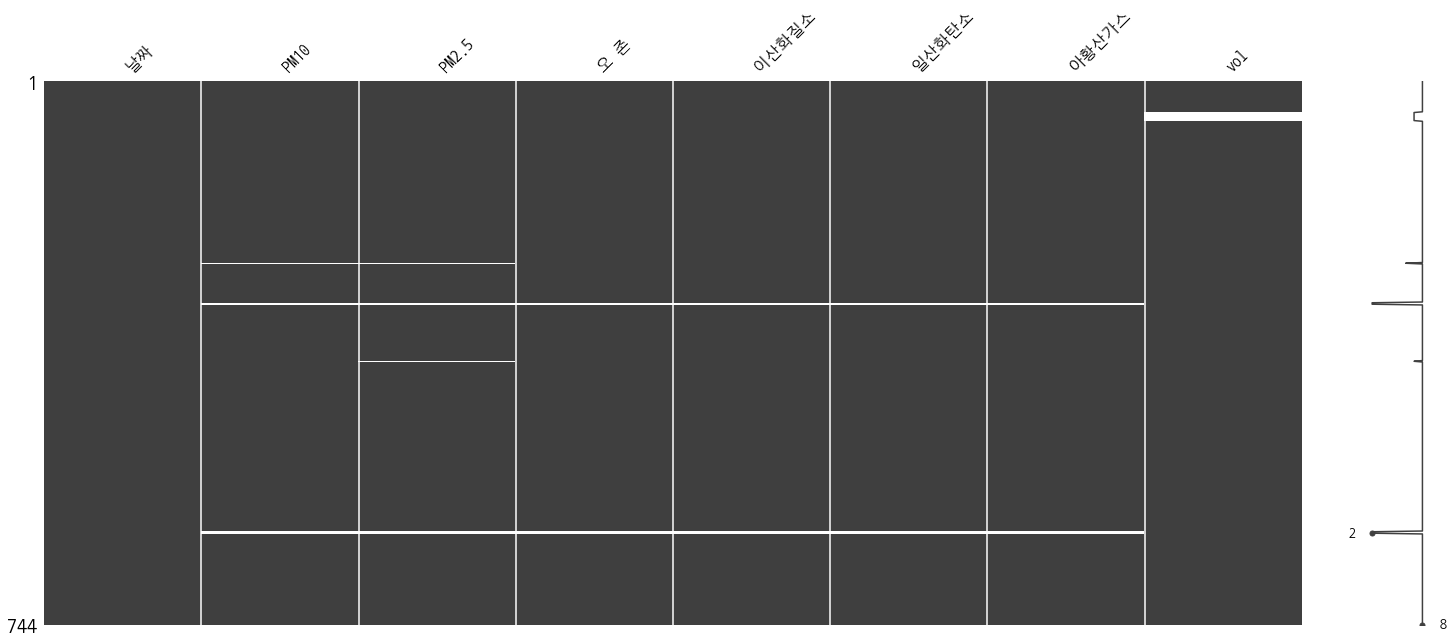

In [11]:
missingno.matrix( rawData )

In [12]:
rawData.loc[rawData['vol'].isna()]

,날짜,PM10,PM2.5,오 존,이산화질소,일산화탄소,아황산가스,vol
dateTime,,,,,,,,
2021-07-02 19:00:00,07-02-20,23.0,17.0,0.040,0.017,0.3,0.003,NaN
2021-07-02 20:00:00,07-02-21,23.0,19.0,0.029,0.025,0.3,0.003,NaN
2021-07-02 21:00:00,07-02-22,21.0,14.0,0.024,0.022,0.3,0.003,NaN
2021-07-02 22:00:00,07-02-23,19.0,12.0,0.020,0.022,0.3,0.003,NaN
2021-07-02 23:00:00,07-02-24,21.0,12.0,0.019,0.022,0.3,0.003,NaN
2021-07-03 00:00:00,07-03-01,19.0,12.0,0.023,0.015,0.3,0.003,NaN
2021-07-03 01:00:00,07-03-02,17.0,11.0,0.026,0.011,0.3,0.003,NaN
2021-07-03 02:00:00,07-03-03,20.0,10.0,0.025,0.010,0.3,0.003,NaN
2021-07-03 03:00:00,07-03-04,16.0,10.0,0.028,0.008,0.2,0.003,NaN


In [14]:
from datetime import datetime
datetime(2021, 7 ,1, hour=18)

datetime.datetime(2021, 7, 1, 18, 0)

In [18]:
rawData.loc[[ datetime(2021, 7, 2, hour=18) ]]

,날짜,PM10,PM2.5,오 존,이산화질소,일산화탄소,아황산가스,vol
dateTime,,,,,,,,
2021-07-02 18:00:00,07-02-19,26.0,16.0,0.042,0.021,0.3,0.003,2107.0


In [19]:
rawData.loc[[ datetime(2021, 7, 3, hour=7) ]]

,날짜,PM10,PM2.5,오 존,이산화질소,일산화탄소,아황산가스,vol
dateTime,,,,,,,,
2021-07-03 07:00:00,07-03-08,13.0,8.0,0.021,0.017,0.2,0.003,844.0


In [24]:

rawData['vol_fill'] = rawData['vol'].fillna( method='bfill')



In [25]:
rawData.loc[ datetime(2021, 7, 2, hour=18):datetime(2021, 7, 3, hour=7) ]

,날짜,PM10,PM2.5,오 존,이산화질소,일산화탄소,아황산가스,vol,vol_fill
dateTime,,,,,,,,,
2021-07-02 18:00:00,07-02-19,26.0,16.0,0.042,0.021,0.3,0.003,2107.0,2107.0
2021-07-02 19:00:00,07-02-20,23.0,17.0,0.040,0.017,0.3,0.003,NaN,844.0
2021-07-02 20:00:00,07-02-21,23.0,19.0,0.029,0.025,0.3,0.003,NaN,844.0
2021-07-02 21:00:00,07-02-22,21.0,14.0,0.024,0.022,0.3,0.003,NaN,844.0
2021-07-02 22:00:00,07-02-23,19.0,12.0,0.020,0.022,0.3,0.003,NaN,844.0
2021-07-02 23:00:00,07-02-24,21.0,12.0,0.019,0.022,0.3,0.003,NaN,844.0
2021-07-03 00:00:00,07-03-01,19.0,12.0,0.023,0.015,0.3,0.003,NaN,844.0
2021-07-03 01:00:00,07-03-02,17.0,11.0,0.026,0.011,0.3,0.003,NaN,844.0
2021-07-03 02:00:00,07-03-03,20.0,10.0,0.025,0.010,0.3,0.003,NaN,844.0


In [28]:
rawData.fillna( method='ffill', inplace=True )
rawData

,날짜,PM10,PM2.5,오 존,이산화질소,일산화탄소,아황산가스,vol,vol_fill
dateTime,,,,,,,,,
2021-07-01 00:00:00,07-01-01,43.0,28.0,0.014,0.036,0.5,0.003,1542.0,1542.0
2021-07-01 01:00:00,07-01-02,38.0,25.0,0.013,0.029,0.5,0.003,1173.0,1173.0
2021-07-01 02:00:00,07-01-03,37.0,25.0,0.014,0.022,0.4,0.003,869.0,869.0
2021-07-01 03:00:00,07-01-04,36.0,23.0,0.016,0.016,0.4,0.003,711.0,711.0
2021-07-01 04:00:00,07-01-05,38.0,22.0,0.014,0.016,0.4,0.003,659.0,659.0
...,...,...,...,...,...,...,...,...,...
2021-07-31 19:00:00,07-31-20,26.0,21.0,0.052,0.015,0.4,0.004,2456.0,2456.0
2021-07-31 20:00:00,07-31-21,26.0,19.0,0.042,0.017,0.4,0.004,1960.0,1960.0
2021-07-31 21:00:00,07-31-22,20.0,14.0,0.051,0.011,0.4,0.004,2083.0,2083.0


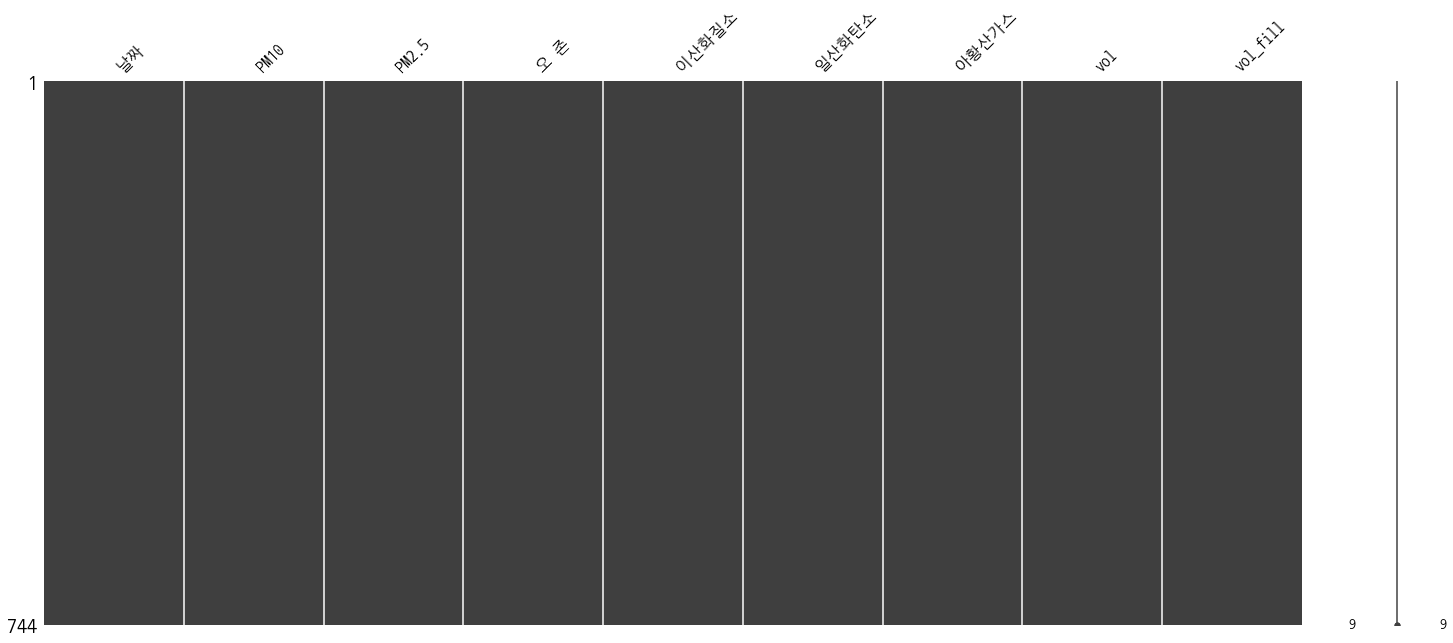

In [29]:
missingno.matrix( rawData )

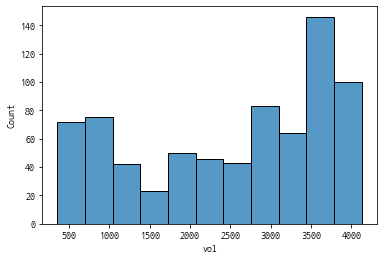

In [31]:
sns.histplot(data=rawData, x='vol')

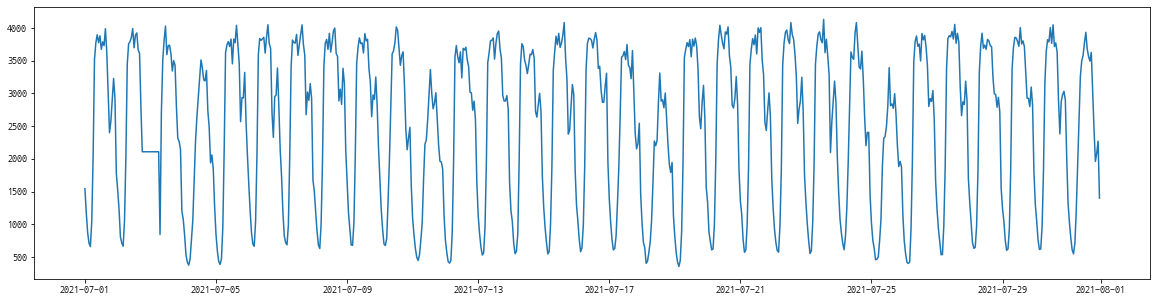

In [33]:
plt.figure(figsize=(20,5))
plt.plot(rawData['vol'])

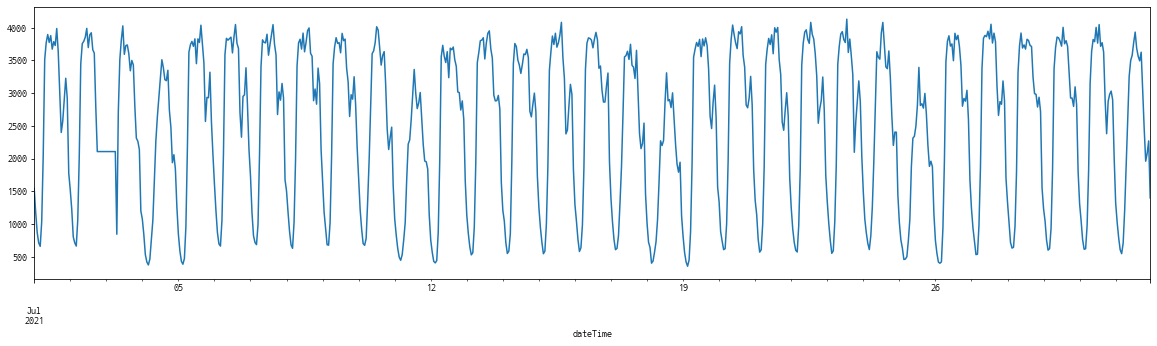

In [34]:
rawData['vol'].plot(kind='line', figsize=(20,5))

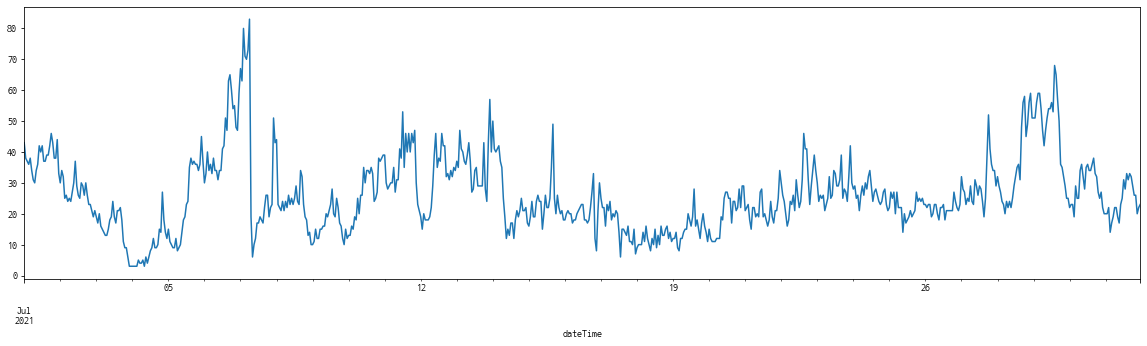

In [37]:
rawData['PM10'].plot(kind='line', figsize=(20,5)) 

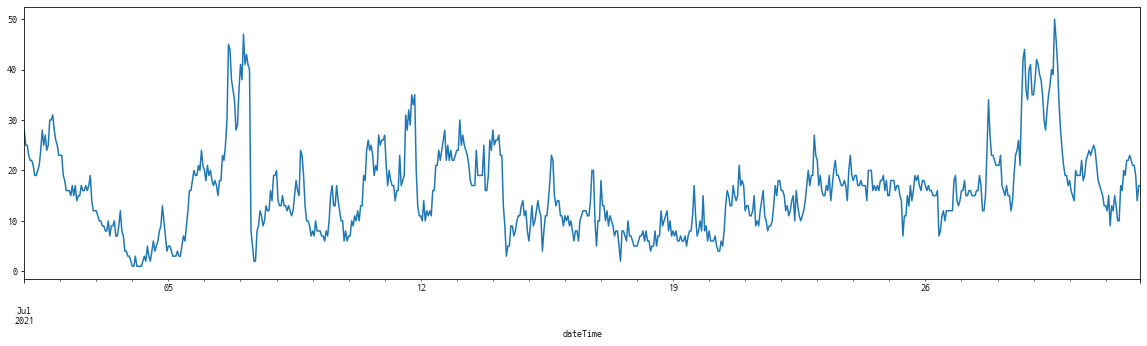

In [38]:
rawData['PM2.5'].plot(kind='line', figsize=(20,5)) 

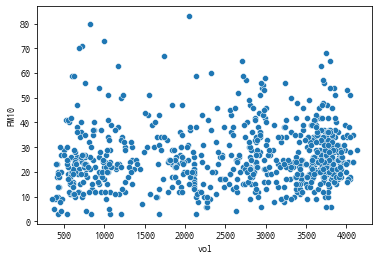

In [47]:
sns.scatterplot(data=rawData, x='vol', y='PM10')

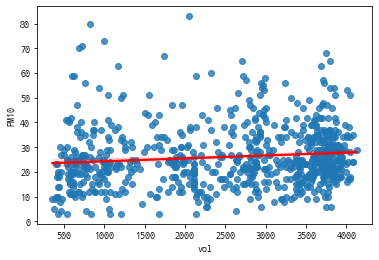

In [45]:
sns.regplot(data=rawData, x='vol', y='PM10', line_kws={'color':'red'})

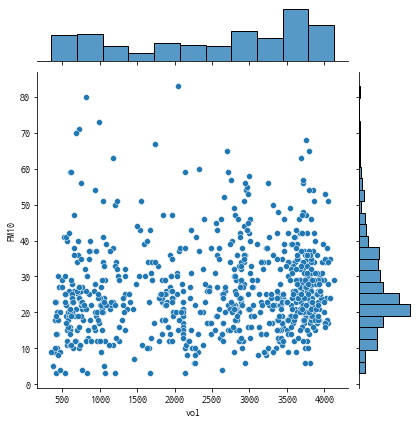

In [46]:
sns.jointplot(data=rawData, x='vol', y='PM10')

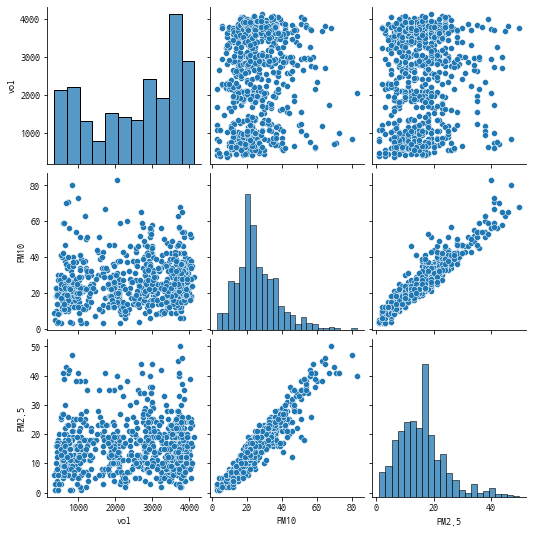

In [54]:
sns.pairplot( rawData[['vol', 'PM10', 'PM2.5']] )

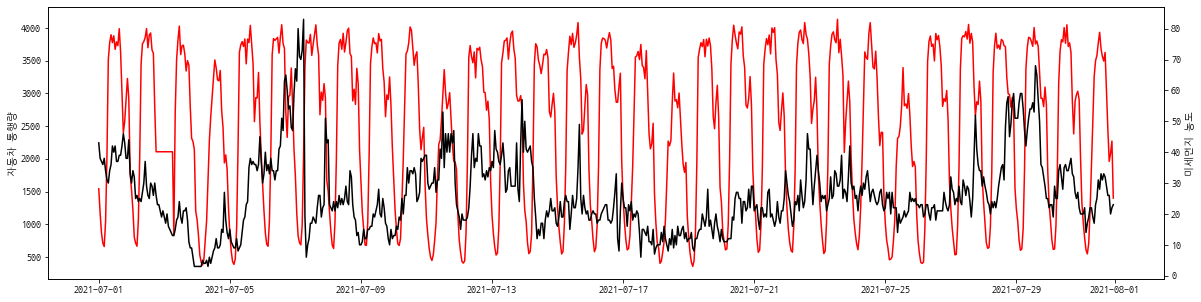

In [53]:
plt.figure( figsize=(20,5) )
plt.plot( rawData['vol'], color='red' )
plt.ylabel('자동차 통행량')

ax = plt.gca()
ax2 = ax.twinx()
plt.plot( rawData['PM10'],color='black' )
ax2.set_ylabel('미세먼지 농도')

plt.show()

In [59]:
rawData['vol_cum'] = rawData['vol'].cumsum()
rawData

,날짜,PM10,PM2.5,오 존,이산화질소,일산화탄소,아황산가스,vol,vol_fill,vol_cum
dateTime,,,,,,,,,,
2021-07-01 00:00:00,07-01-01,43.0,28.0,0.014,0.036,0.5,0.003,1542.0,1542.0,1542.0
2021-07-01 01:00:00,07-01-02,38.0,25.0,0.013,0.029,0.5,0.003,1173.0,1173.0,2715.0
2021-07-01 02:00:00,07-01-03,37.0,25.0,0.014,0.022,0.4,0.003,869.0,869.0,3584.0
2021-07-01 03:00:00,07-01-04,36.0,23.0,0.016,0.016,0.4,0.003,711.0,711.0,4295.0
2021-07-01 04:00:00,07-01-05,38.0,22.0,0.014,0.016,0.4,0.003,659.0,659.0,4954.0
...,...,...,...,...,...,...,...,...,...,...
2021-07-31 19:00:00,07-31-20,26.0,21.0,0.052,0.015,0.4,0.004,2456.0,2456.0,1868491.0
2021-07-31 20:00:00,07-31-21,26.0,19.0,0.042,0.017,0.4,0.004,1960.0,1960.0,1870451.0
2021-07-31 21:00:00,07-31-22,20.0,14.0,0.051,0.011,0.4,0.004,2083.0,2083.0,1872534.0


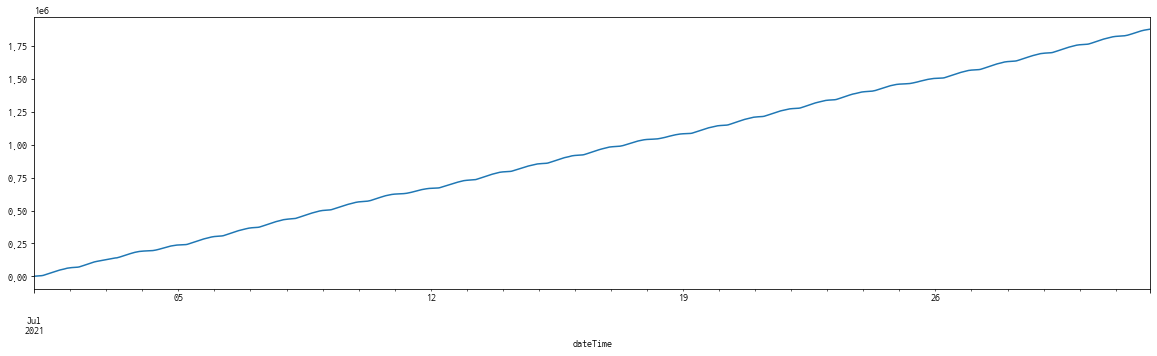

In [60]:
rawData['vol_cum'].plot(kind='line', figsize=(20,5))

In [62]:
rawData['vol_diff']= rawData['vol'].diff()
rawData['vol_diff'].fillna( method='bfill', inplace=True)

In [63]:
rawData['vol_diff'] = - rawData['vol_diff']
rawData

,날짜,PM10,PM2.5,오 존,이산화질소,일산화탄소,아황산가스,vol,vol_fill,vol_cum,vol_diff
dateTime,,,,,,,,,,,
2021-07-01 00:00:00,07-01-01,43.0,28.0,0.014,0.036,0.5,0.003,1542.0,1542.0,1542.0,369.0
2021-07-01 01:00:00,07-01-02,38.0,25.0,0.013,0.029,0.5,0.003,1173.0,1173.0,2715.0,369.0
2021-07-01 02:00:00,07-01-03,37.0,25.0,0.014,0.022,0.4,0.003,869.0,869.0,3584.0,304.0
2021-07-01 03:00:00,07-01-04,36.0,23.0,0.016,0.016,0.4,0.003,711.0,711.0,4295.0,158.0
2021-07-01 04:00:00,07-01-05,38.0,22.0,0.014,0.016,0.4,0.003,659.0,659.0,4954.0,52.0
...,...,...,...,...,...,...,...,...,...,...,...
2021-07-31 19:00:00,07-31-20,26.0,21.0,0.052,0.015,0.4,0.004,2456.0,2456.0,1868491.0,583.0
2021-07-31 20:00:00,07-31-21,26.0,19.0,0.042,0.017,0.4,0.004,1960.0,1960.0,1870451.0,496.0
2021-07-31 21:00:00,07-31-22,20.0,14.0,0.051,0.011,0.4,0.004,2083.0,2083.0,1872534.0,-123.0


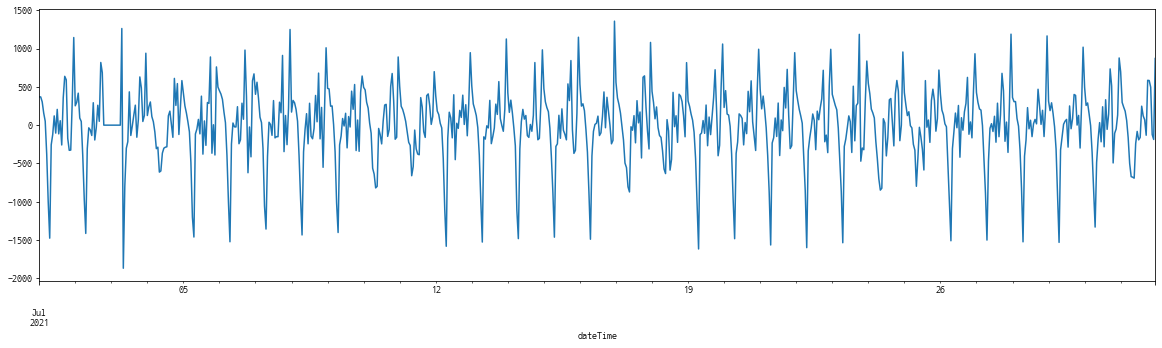

In [64]:
rawData['vol_diff'].plot( kind='line', figsize=(20, 5) )

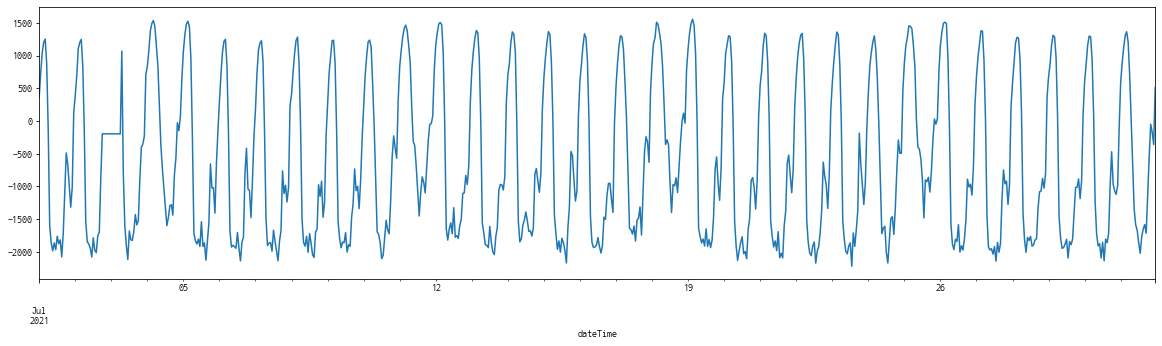

In [65]:
rawData['vol_diff'].cumsum().plot( kind='line', figsize=(20,5) )